## Keşifçi Veri Analizi | Becerileri Pekiştirme

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [16]:
!pip install missingno

In [18]:
import numpy as np
import seaborn as sns
import pandas as pd
from statistics import mode
import missingno as msno

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [19]:
df = pd.read_csv("iris.csv")

In [26]:
df.shape

(150, 5)

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [21]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [22]:
print("ÖZNİTELİK SAYISI : {}".format(df.shape[1]))
print("GÖZLEM SAYISI : {}".format(df.size))

ÖZNİTELİK SAYISI : 5
GÖZLEM SAYISI : 750


Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [23]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [34]:
def dfDonustur(oznitelik):
    x=[]
    for i in df[oznitelik]:
        x +=[i]
    x.sort()
    y=len(x)
    return x,y

def AritmetikOrt(oznitelik):
    sayac=0
    toplam=0
    for i in df[oznitelik]:
        toplam +=i
        sayac=sayac+1
    return toplam/sayac

def Medyan(oznitelik):
    x,y=dfDonustur(oznitelik)
    if(y%2 == 0):
        medyan=(x[y//2-1] + x[y//2] ) / 2
    else:
        medyan=x[((y+1)//2)-1]
    return medyan
    
def KartilHesapla(oznitelik):
    x,y=dfDonustur(oznitelik)
    q1= (y+2)//8
    q3= (3*y+2)//4
    print("{} için :\n\t1.KARTİL = {} , indis:{}\n\t3.KARTİL = {} , indis:{}".format(oznitelik,x[q1-1],q1-1,x[q3-1],q3-1))

def RanjHesapla(oznitelik):
    x,y=dfDonustur(oznitelik)
    ranj=x[0] - x[y-1]
    print("{} için RANJ = {}".format(oznitelik,ranj))

def StandartSapma(oznitelik):
    aort=AritmetikOrt(oznitelik)
    x,y=dfDonustur(oznitelik)
    toplam=0
    for i in x :
        toplam += (i - aort)**2
    return toplam/(y-1)

def Varyans(oznitelik):
    return StandartSapma(oznitelik)**2

def Carpiklik(oznitelik):
    c=(AritmetikOrt(oznitelik) - Medyan(oznitelik)) / StandartSapma(oznitelik)
    return c

def Basiklik(oznitelik):
    x,y=dfDonustur(oznitelik)
    aort=AritmetikOrt(oznitelik)
    toplam=0
    for i in x:
        toplam += (i-aort)**4
    return (toplam/((StandartSapma(oznitelik)**4) *y))

for i in range(0,4):
    a=df.columns[i]
    print("{} için A.ORT = {}".format(a,AritmetikOrt(a)))
    print("{} için MEDYAN = {}".format(a,Medyan(a)))
    print("{} için MOD = {}".format(a,mode(df[a])))
    KartilHesapla(a)
    RanjHesapla(a)
    print("{} için STANDART SAPMA = {}".format(a,StandartSapma(a)))
    print("{} için VARYANS = {}".format(a,Varyans(a)))
    print("{} için ÇARPIKLIK = {}".format(a,Carpiklik(a)))
    print("{} için BASIKLIK = {}".format(a,Basiklik(a)))
    print(50*"-")

sepal.length için A.ORT = 5.843333333333335
sepal.length için MEDYAN = 5.8
sepal.length için MOD = 5.0
sepal.length için :
	1.KARTİL = 4.9 , indis:18
	3.KARTİL = 6.4 , indis:112
sepal.length için RANJ = -3.6000000000000005
sepal.length için STANDART SAPMA = 0.685693512304251
sepal.length için VARYANS = 0.47017559281614
sepal.length için ÇARPIKLIK = 0.06319635895010076
sepal.length için BASIKLIK = 5.092113460870523
--------------------------------------------------
sepal.width için A.ORT = 3.057333333333334
sepal.width için MEDYAN = 3.0
sepal.width için MOD = 3.0
sepal.width için :
	1.KARTİL = 2.5 , indis:18
	3.KARTİL = 3.3 , indis:112
sepal.width için RANJ = -2.4000000000000004
sepal.width için STANDART SAPMA = 0.18997941834451917
sepal.width için VARYANS = 0.03609217939452183
sepal.width için ÇARPIKLIK = 0.3017870768998918
sepal.width için BASIKLIK = 86.96356743580634
--------------------------------------------------
petal.length için A.ORT = 3.7580000000000027
petal.length için MEDY

## Korelasyon ve Kovaryans Hesabı

In [9]:
def DiziToplamKare(dizi,ort):
    toplam=0
    for i in dizi:
        toplam += (i-ort)**2
    return toplam
        
def DizilerCarpimToplam(dizi1,dizi1ort,dizi2,dizi2ort):
    toplam=0
    for i in dizi1:
        for j in dizi2:
            toplam += (i-dizi1ort) * (j-dizi2ort)
    return toplam
    
def Korelasyon(oznitelik1,oznitelik2):
    x=dfDonustur(oznitelik1)[0]
    y=dfDonustur(oznitelik2)[0]
    xort=AritmetikOrt(oznitelik1)
    yort=AritmetikOrt(oznitelik2)
    carpimToplam=DizilerCarpimToplam(x,xort,y,yort)
    dizi1ToplamKare=DiziToplamKare(x,xort)
    dizi2ToplamKare=DiziToplamKare(y,yort)
    return ( carpimToplam / ( (dizi1ToplamKare * dizi2ToplamKare)**(1/2) ) )

def Kovaryans(oznitelik1,oznitelik2):
    x=dfDonustur(oznitelik1)[0]
    y=dfDonustur(oznitelik2)[0]
    xort=AritmetikOrt(oznitelik1)
    yort=AritmetikOrt(oznitelik2)
    return DizilerCarpimToplam(x,xort,y,yort) / len(x)
    

print("{} ile {} arasındaki Korelasyon = {}".format(df.columns[0],df.columns[1],
                                                    Korelasyon(df.columns[0],df.columns[1])))
print("{} ile {} arasındaki Kovaryans = {}".format(df.columns[0],df.columns[1],
                                                    Kovaryans(df.columns[0],df.columns[1])))

sepal.length ile sepal.width arasındaki Korelasyon = -1.462460742269553e-14
sepal.length ile sepal.width arasındaki Kovaryans = -5.243213270963073e-15


In [33]:
print("{}-{} Korelasyon = {}".format(df.columns[0],df.columns[1],
                                  df[df.columns[0]].corr(df[df.columns[1]])))
print("{}-{} Kovaryans = {}".format(df.columns[0],df.columns[1],
                                  df[df.columns[0]].cov(df[df.columns[1]])))

sepal.length-sepal.width Korelasyon = -0.11756978413300208
sepal.length-sepal.width Kovaryans = -0.042434004474272924


Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


<AxesSubplot:>

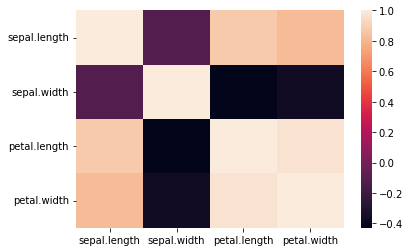

In [109]:
korelasyon_matris=df.corr()
print(korelasyon_matris)
sns.heatmap(korelasyon_matris)

In [86]:
for i in range(0,4):
    for j in range(0,4):
        if(i==j):
            continue
        print("{}-{} Korelasyon= {}".format(df.columns[i],df.columns[j],
                                  df[df.columns[i]].corr(df[df.columns[j]])))
    print(50*"-")

sepal.length-sepal.width Korelasyon= -0.11756978413300208
sepal.length-petal.length Korelasyon= 0.8717537758865831
sepal.length-petal.width Korelasyon= 0.8179411262715757
--------------------------------------------------
sepal.width-sepal.length Korelasyon= -0.11756978413300208
sepal.width-petal.length Korelasyon= -0.4284401043305394
sepal.width-petal.width Korelasyon= -0.36612593253643927
--------------------------------------------------
petal.length-sepal.length Korelasyon= 0.8717537758865831
petal.length-sepal.width Korelasyon= -0.4284401043305395
petal.length-petal.width Korelasyon= 0.9628654314027961
--------------------------------------------------
petal.width-sepal.length Korelasyon= 0.8179411262715757
petal.width-sepal.width Korelasyon= -0.3661259325364393
petal.width-petal.length Korelasyon= 0.9628654314027961
--------------------------------------------------


Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

<AxesSubplot:>

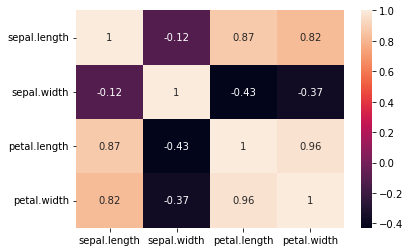

In [105]:
sns.heatmap(korelasyon_matris,annot=True)

SONUÇ OLARAK EN GÜÇLÜ POZİTİF İLİŞKİ petal.width ile petal.length arasında olduğu görülecektir.

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [317]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [319]:
print("ADET : ",len(df["variety"].unique()))

ADET :  3


Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

C:\Users\cihan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


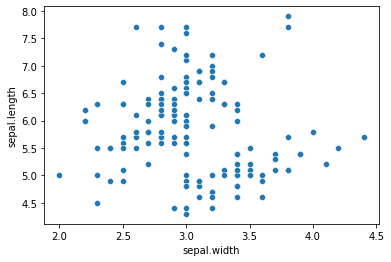

In [244]:
sns.scatterplot(df["sepal.width"], df["sepal.length"]);

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

C:\Users\cihan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


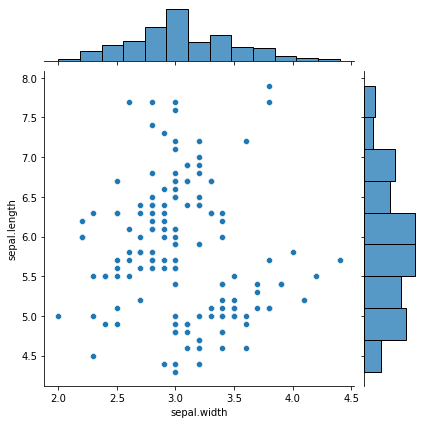

In [250]:
sns.jointplot(df["sepal.width"], df["sepal.length"]);

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

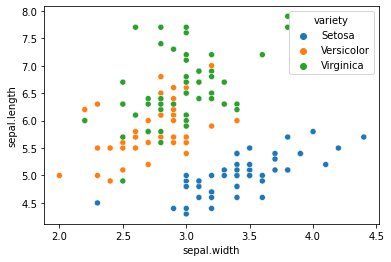

In [260]:
sns.scatterplot(x="sepal.width", y="sepal.length",data=df,hue="variety");

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [261]:
df.value_counts()

sepal.length  sepal.width  petal.length  petal.width  variety   
5.8           2.7          5.1           1.9          Virginica     2
6.2           2.2          4.5           1.5          Versicolor    1
              2.9          4.3           1.3          Versicolor    1
              3.4          5.4           2.3          Virginica     1
6.3           2.3          4.4           1.3          Versicolor    1
                                                                   ..
5.4           3.9          1.3           0.4          Setosa        1
                           1.7           0.4          Setosa        1
5.5           2.3          4.0           1.3          Versicolor    1
              2.4          3.7           1.0          Versicolor    1
7.9           3.8          6.4           2.0          Virginica     1
Length: 149, dtype: int64

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

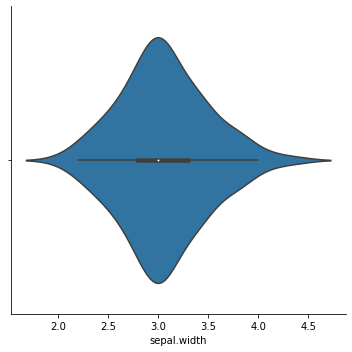

In [43]:
sns.catplot(x="sepal.width",data=df,kind="violin")

Cevap: Evet söyleyebiliriz çünkü veriler orta noktalarda daha yoğun uç noktalarda ise daha sivri bir durumda gözüküyor

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

C:\Users\cihan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


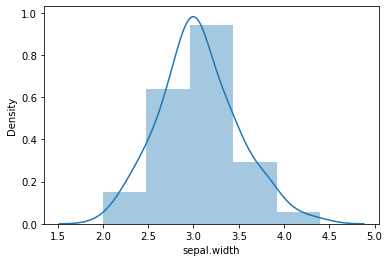

In [42]:
sns.distplot(df["sepal.width"], bins = 5);

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

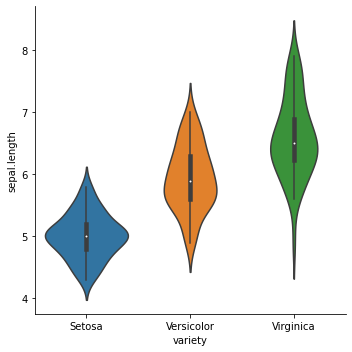

In [67]:
sns.catplot(x="variety",y="sepal.length",data=df,kind="violin")

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

<AxesSubplot:xlabel='variety', ylabel='count'>

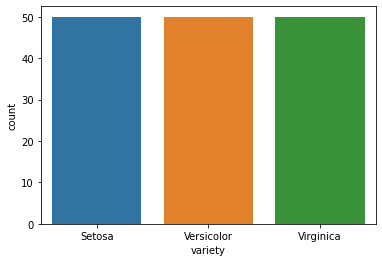

In [74]:
sns.countplot(x="variety",data=df)

CEVAP : HER ÇİÇEK TÜRÜ İÇİN 50'ŞER ADET GÖZLEM BARINDIRIYOR DATAFRAME.

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

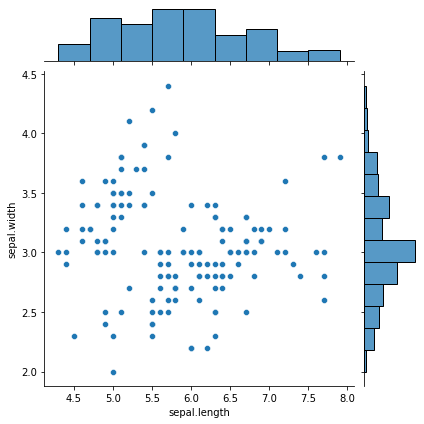

In [77]:
sns.jointplot(x="sepal.length",y="sepal.width",data=df)

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

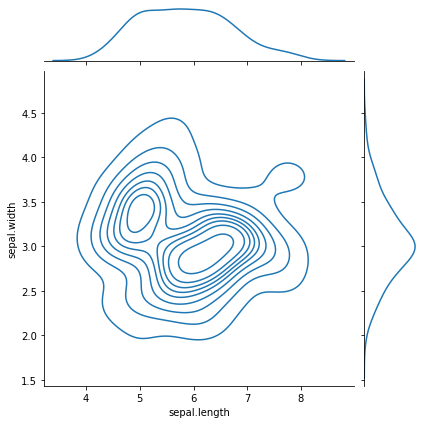

In [78]:
sns.jointplot(x="sepal.length",y="sepal.width",data=df,kind="kde")

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

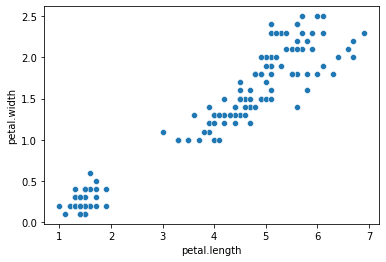

In [79]:
sns.scatterplot(x="petal.length",y="petal.width",data=df)

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

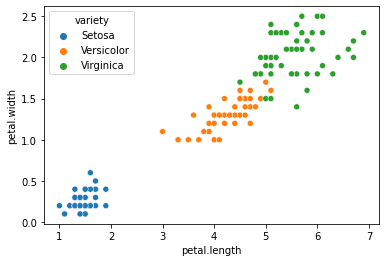

In [80]:
sns.scatterplot(x="petal.length",y="petal.width",data=df,hue="variety")

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

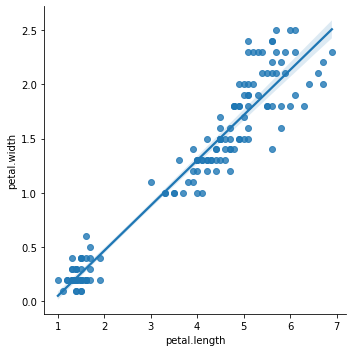

In [82]:
sns.lmplot(x="petal.length",y="petal.width",data=df)

Pozitif Yönlü Güçlü Bir İlişki vardır.

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [85]:
print("{}-{} Korelasyon = {}".format("petal.length","petal.width",
                                  df["petal.length"].corr(df["petal.width"])))

petal.length-petal.width Korelasyon = 0.9628654314027961


Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [112]:
x=df["sepal.length"]+df["petal.length"]
print(type(x))
m=[]
for i in x:
    m +=[i]
df2=pd.DataFrame(m,columns=["total.length"])
df2.head(10)

<class 'pandas.core.series.Series'>


,total.length
0,6.5
1,6.3
2,6.0
3,6.1
4,6.4
5,7.1
6,6.0
7,6.5
8,5.8
9,6.4


total.length'in ortalama değerini yazdıralım. 

In [288]:
df2["total.length"].mean()

9.601333333333338

total.length'in standart sapma değerini yazdıralım.

In [289]:
df2["total.length"].std()

2.5200401260964997

sepal.length'in maksimum değerini yazdıralım.

In [290]:
df["sepal.length"].max()

7.9

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [308]:
df[(df["sepal.length"]>5.5) & (df["variety"]=="Setosa")]

,sepal.length,sepal.width,petal.length,petal.width,variety
14,5.8,4.0,1.2,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
18,5.7,3.8,1.7,0.3,Setosa


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [314]:
df.loc[(df["petal.length"]<5) & (df["variety"]=="Virginica") , ["sepal.length","sepal.width"]]

,sepal.length,sepal.width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [315]:
df[df["variety"]=="Setosa"].mean()

C:\Users\cihan\AppData\Local\Temp/ipykernel_12204/2387183359.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["variety"]=="Setosa"].mean()


sepal.length    5.006
sepal.width     3.428
petal.length    1.462
petal.width     0.246
dtype: float64

Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [316]:
df.loc[(df["variety"]=="Setosa") , ["petal.length"]].std()

petal.length    0.173664
dtype: float64

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.